In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [14]:
start ='2010-01-01'
end = '2020-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462009
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562589
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457408


In [15]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352844
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050781
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239288
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473


In [16]:
df=df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [17]:
#split test/train
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)


In [20]:
data_training_array.shape

(1938, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=50 , activation = 'relu' , return_sequences = True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)              

In [25]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 10s 128ms/step - loss: 0.0528
Epoch 2/50
58/58 [==============================] - 7s 127ms/step - loss: 0.0100
Epoch 3/50
58/58 [==============================] - 8s 134ms/step - loss: 0.0101
Epoch 4/50
58/58 [==============================] - 8s 135ms/step - loss: 0.0082
Epoch 5/50
58/58 [==============================] - 8s 143ms/step - loss: 0.0070
Epoch 6/50
58/58 [==============================] - 8s 144ms/step - loss: 0.0067
Epoch 7/50
58/58 [==============================] - 8s 141ms/step - loss: 0.0062
Epoch 8/50
58/58 [==============================] - 8s 143ms/step - loss: 0.0063
Epoch 9/50
58/58 [==============================] - 8s 142ms/step - loss: 0.0066
Epoch 10/50
58/58 [==============================] - 8s 145ms/step - loss: 0.0075
Epoch 11/50
58/58 [==============================] - 8s 143ms/step - loss: 0.0059
Epoch 12/50
58/58 [==============================] - 8s 143ms/step - loss: 0.0056
Epoch 13/50
58/58 [=====

In [26]:
model.save('LSTM_stock.h5')

In [27]:
past100 = data_training.tail(100)
final_df = past100.append(data_testing, ignore_index=True)

In [29]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [30]:
input_data=scaler.fit_transform(final_df)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
#making pridictions

y_predicted = model.predict(x_test)

In [38]:
y_predicted.shape

(832, 1)

In [39]:
scaler.scale_

array([0.00988704])

In [42]:
scale_factor = 1/0.00988704
y_predicted = y_predicted*scale_factor
y_test=y_test*scale_factor

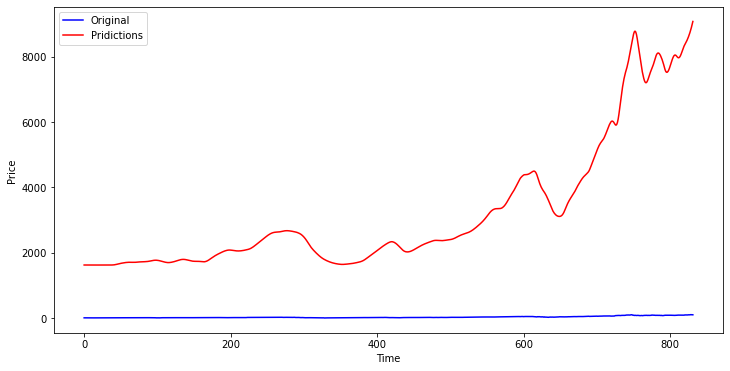

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label='Original')
plt.plot(y_predicted, 'r', label='Pridictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()